In [8]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 91 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638445 sha256=239b7f44a2a33babbccca3945befd891eaf0e427338cbb12302b186275ac47a2
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv("Diesel.csv")
data

,Tanggal,qty,Jumlah
0,2016-01-01,836,5600932.0
1,2016-01-02,964,6460341.0
2,2016-01-03,1900,12727990.0
3,2016-01-04,1944,13023929.0
4,2016-01-05,7653,43238490.0
...,...,...,...
2187,2021-12-27,3892,20043800.0
2188,2021-12-28,3848,19817200.0
2189,2021-12-29,3915,20162250.0
2190,2021-12-30,2715,13982250.0


In [3]:
data.isnull().sum()

Tanggal    0
qty        0
Jumlah     0
dtype: int64

<AxesSubplot: >

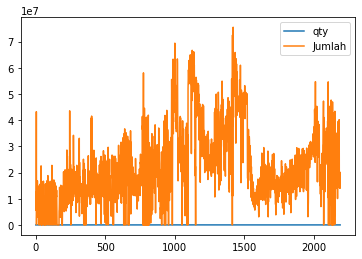

In [4]:
data.plot()

<AxesSubplot: >

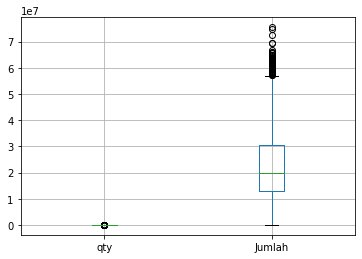

In [5]:
data.boxplot()

In [7]:
data.columns = ['Tanggal', 'qty', 'Jumlah']
data = data.rename(columns = {"Tanggal":"ds","Jumlah":"y"})
del data['qty']
data.head()

,ds,y
0,2016-01-01,5600932.0
1,2016-01-02,6460341.0
2,2016-01-03,12727990.0
3,2016-01-04,13023929.0
4,2016-01-05,43238490.0


In [8]:
data = data.fillna(data.mode())
data.isnull().sum()

ds    0
y     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2192 non-null   object 
 1   y       2192 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.4+ KB


In [10]:
data['ds'] = pd.to_datetime(data['ds'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2192 non-null   datetime64[ns]
 1   y       2192 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.4 KB


In [12]:
data.head()

,ds,y
0,2016-01-01,5600932.0
1,2016-01-02,6460341.0
2,2016-01-03,12727990.0
3,2016-01-04,13023929.0
4,2016-01-05,43238490.0


In [13]:
from prophet import Prophet

In [14]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [15]:
model = Prophet()

In [16]:
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [17]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [18]:
future_dates = model.make_future_dataframe(periods = 365)

In [30]:
future_dates.tail()

,ds
2552,2022-12-27
2553,2022-12-28
2554,2022-12-29
2555,2022-12-30
2556,2022-12-31


In [31]:
future_dates.head()

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05


In [32]:
prediction = model.predict(future_dates)

In [33]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,7.044263e+06,-4.341752e+06,2.155593e+07,7.044263e+06,7.044263e+06,1.743311e+06,1.743311e+06,1.743311e+06,2.878600e+04,2.878600e+04,2.878600e+04,1.714525e+06,1.714525e+06,1.714525e+06,0.0,0.0,0.0,8.787574e+06
1,2016-01-02,7.061249e+06,-5.480904e+06,2.121739e+07,7.061249e+06,7.061249e+06,5.753496e+05,5.753496e+05,5.753496e+05,-1.432128e+06,-1.432128e+06,-1.432128e+06,2.007477e+06,2.007477e+06,2.007477e+06,0.0,0.0,0.0,7.636598e+06
2,2016-01-03,7.078234e+06,-7.041183e+06,1.856111e+07,7.078234e+06,7.078234e+06,-1.505039e+06,-1.505039e+06,-1.505039e+06,-3.797391e+06,-3.797391e+06,-3.797391e+06,2.292351e+06,2.292351e+06,2.292351e+06,0.0,0.0,0.0,5.573195e+06
3,2016-01-04,7.095219e+06,-3.070248e+06,2.293353e+07,7.095219e+06,7.095219e+06,2.958678e+06,2.958678e+06,2.958678e+06,3.901560e+05,3.901560e+05,3.901560e+05,2.568522e+06,2.568522e+06,2.568522e+06,0.0,0.0,0.0,1.005390e+07
4,2016-01-05,7.112205e+06,-1.342888e+06,2.327014e+07,7.112205e+06,7.112205e+06,4.181648e+06,4.181648e+06,4.181648e+06,1.345818e+06,1.345818e+06,1.345818e+06,2.835829e+06,2.835829e+06,2.835829e+06,0.0,0.0,0.0,1.129385e+07


In [34]:
# prediction['ds'] = prediction['ds'].apply(pd.Timestamp.timestamp)
# prediction = np.array(prediction, dtype=float)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

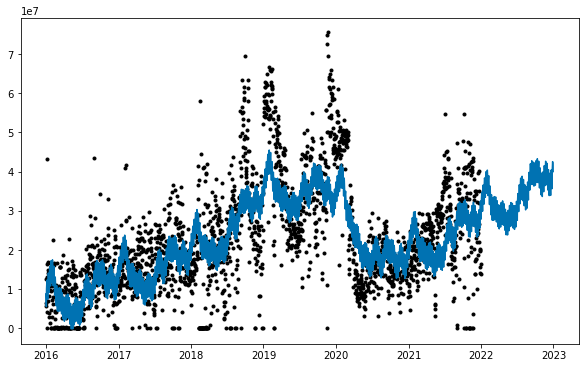

In [35]:
model.plot(prediction)

/home/rspn/.local/lib/python3.10/site-packages/prophet/plot.py:131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'weekly' in m.seasonalities and 'weekly' in fcst:
/home/rspn/.local/lib/python3.10/site-packages/prophet/plot.py:134: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'yearly' in m.seasonalities and 'yearly' in fcst:
/home/rspn/.local/lib/python3.10/site-packages/prophet/plot.py:139: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if name in fcst and name not in ['weekly', 'yearly']


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

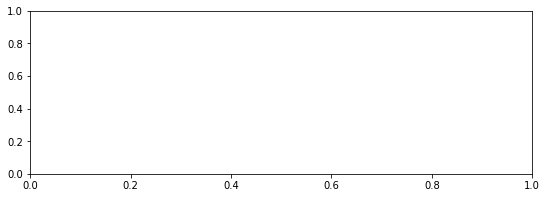

In [25]:
model.plot_components(prediction)

In [103]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = "730 days", period = "180days", horizon= "365 days")
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-03-10 00:00:00 and 2016-08-31 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-03-11,43.297851,39.179419,47.039504,48.06,2015-03-10
1,2015-03-12,43.014595,39.269514,47.151484,47.12,2015-03-10
2,2015-03-13,42.754843,38.634367,46.947324,44.88,2015-03-10
3,2015-03-16,42.056940,38.143658,46.355736,43.93,2015-03-10
4,2015-03-17,41.331059,37.176634,45.727456,43.39,2015-03-10


In [105]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,58.110777,7.623042,5.877717,0.126391,0.110327,0.460000
1,38 days,64.679010,8.042326,6.203125,0.132776,0.118710,0.440000
2,39 days,67.130387,8.193314,6.369348,0.136323,0.127053,0.426667
3,40 days,70.133131,8.374553,6.561484,0.140097,0.128776,0.400000
4,41 days,75.643615,8.697334,6.822844,0.144501,0.131321,0.383333


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


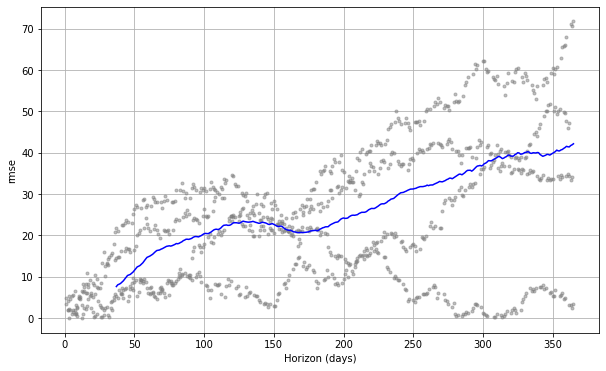

In [107]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric (df_cv, metric = 'rmse')